In [1]:
# Installing and importing essential libraries

!pip install clean-text
!pip install spacy
!pip install gensim
!pip install pyldavis
!pip install wordcloud
!pip install textblob
!pip install textstat
!pip install nltk
!pip install unidecode

In [2]:
import nltk 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')
nltk.download('twitter_samples')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jackn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jackn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jackn\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\jackn\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\jackn\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jackn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-

True

In [3]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nltk, time
from nltk.tokenize import word_tokenize
from nltk.corpus import twitter_samples
from collections import Counter
from nltk.stem import WordNetLemmatizer
import collections, itertools
from cleantext import clean

In [4]:
from nltk.corpus import twitter_samples

# These are samples we can use to test our functions. 

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')

In [5]:
# This function helps us tokenize the text before we apply cleaning to it. 

def custom_tokenize(text):
    """Funtion that tokenizes text"""
    from nltk.tokenize import word_tokenize
    if not text:
        print('This is not recognized as text. Tokenized as None type. Defaulting to blank string.')
        text = ''
    return word_tokenize(text)

In [11]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag
import re, string

# The below function is used to remove noise from the data. It cleans and lemmatizes the data. 

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
import re, string

def remove_noise(tweet_tokens, stop_words = ()):
    
    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)
        token = token.replace('RT', '')
        token = token.replace('retweet', '')
        token = token.replace('http', '')
        token = clean(token, fix_unicode = True, to_ascii = True, no_urls = True, no_punct = True)
        

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
            
    return cleaned_tokens

In [12]:
# Test run on the test_tweets.csv, which is just the 19 first tweets in the all_tweets.csv file. 

start = time.time()
warnings.filterwarnings("ignore")
use_cols = ['text']
path = r'C:\Users\jackn\Documents\Machine Learning with Python\test_tweets.csv'
data_iterator = pd.read_csv(path, usecols = use_cols)
chunk_list = [];

for data_chunk in data_iterator["text"]:
    tokenized_chunk = custom_tokenize(data_chunk)
    filtered_chunk = remove_noise(tokenized_chunk, stop_words)
    chunk_list.append(filtered_chunk)

cleaned_tweets_test = pd.DataFrame({'text':chunk_list})
end = time.time()
time_taken = end - start
print(time_taken)

1.8122687339782715


In [13]:
# Looking at the data. 

cleaned_tweets_test.shape

(200, 1)

In [15]:
cleaned_tweets_test.head()

,text
0,"[rudygiuliani, compete, town, hall, joke, step..."
1,"[rachelv12, trump, machismo, tcoykfacdodju]"
2,"[briantylercohen, biden, like, encyclopedia, t..."
3,"[bradleywhitford, yo, semites, qanon, nt, hate..."
4,"[actbrigitte, retweet, president, trump, win, ..."


In [16]:
path = r"C:\Users\jackn\Documents\Machine Learning with Python\cleaned_tweets_test.json"
cleaned_tweets_test.to_json(path, orient = 'table')

In [17]:
# EDA

# Import the tweets from the json file into a pandas dataframe

path = r"C:\Users\jackn\Documents\Machine Learning with Python\cleaned_tweets_test.json"
tidy_tweets = pd.read_json(path, orient='table')
tweets = tidy_tweets['text']

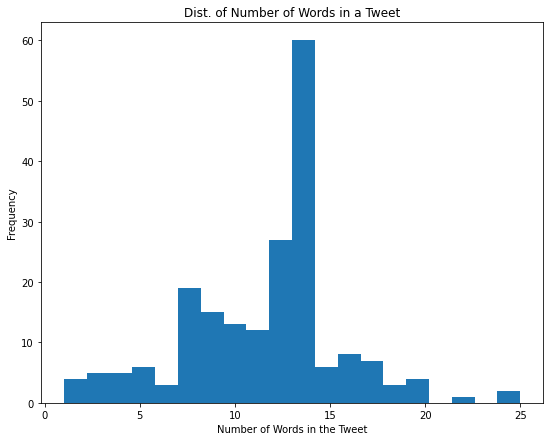

In [18]:
word_freq_hist = tweets.str.len().hist(grid = False, figsize = (9,7), bins = 20)
word_freq_hist = plt.xlabel('Number of Words in the Tweet')
word_freq_hist = plt.ylabel('Frequency')
word_freq_hist = plt.title('Dist. of Number of Words in a Tweet')
plt.show()

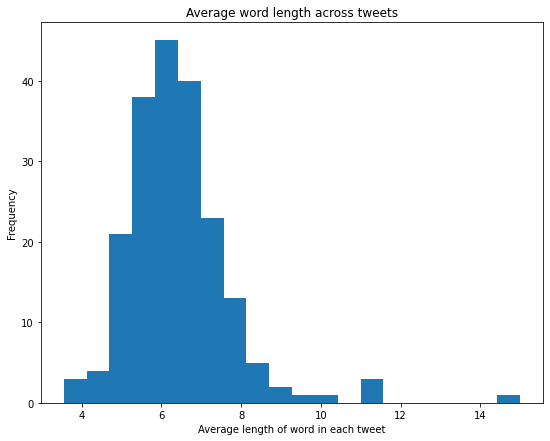

In [19]:
word_len_hist = tweets.apply(lambda x: [len(word) for word in x]).apply(lambda y: np.mean(y)).hist(grid=False, bins=20, figsize=(9,7))
word_len_hist = plt.xlabel('Average length of word in each tweet')
word_len_hist = plt.ylabel('Frequency')
word_len_hist = plt.title('Average word length across tweets')
plt.show()

In [20]:
from gensim.corpora.dictionary import Dictionary

dictionary = Dictionary(tweets)
corpus = tweets.apply(lambda x: dictionary.doc2bow(x))

In [21]:
print(corpus)

0      [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1...
1                   [(14, 1), (15, 1), (16, 1), (17, 1)]
2      [(0, 1), (18, 1), (19, 1), (20, 1), (21, 1), (...
3      [(29, 1), (30, 1), (31, 1), (32, 1), (33, 1), ...
4      [(17, 1), (42, 1), (43, 1), (44, 1), (45, 1), ...
                             ...                        
195    [(67, 1), (128, 1), (289, 1), (520, 1), (1242,...
196    [(17, 1), (67, 1), (119, 1), (121, 1), (122, 1...
197    [(17, 1), (339, 1), (577, 1), (601, 1), (1255,...
198    [(4, 1), (12, 1), (17, 1), (26, 1), (44, 1), (...
199    [(17, 1), (1270, 1), (1271, 1), (1272, 1), (12...
Name: text, Length: 200, dtype: object


In [22]:
import collections, itertools

total_word_count = collections.defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

In [23]:
sorted_bow = sorted(total_word_count.items(), key=lambda kv :kv[1], reverse=True)
words = []
word_counts = []
for word_id, word_count in sorted_bow[:20]:
    words.append(dictionary.get(word_id)) 
    word_counts.append(word_count)

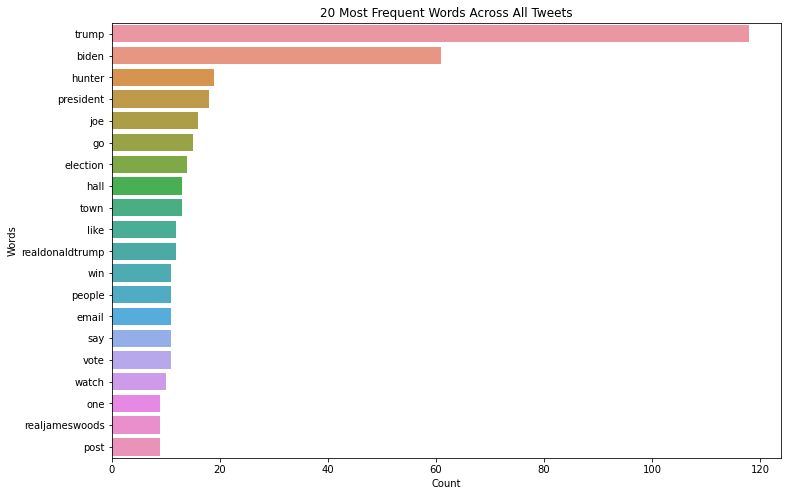

In [24]:
# We can now show some plots showing the distribution of words: 

fig = plt.figure(figsize=(12,8))
fig = sns.barplot(x=word_counts, y=words)
fig = plt.xlabel("Count")
fig = plt.ylabel('Words')
fig = plt.title('20 Most Frequent Words Across All Tweets')
plt.show()

In [25]:
# We use the ngrams package in nltk to show the distributions of ngrams across the data. 

from nltk.util import ngrams
start = time.time()

bigrams = tweets.apply(lambda x: ngrams(x,2))

In [26]:
bi_grams = bigrams.apply(lambda x: list(x))

In [27]:
top_20_bigrams = Counter(itertools.chain.from_iterable(bi_grams)).most_common(20)

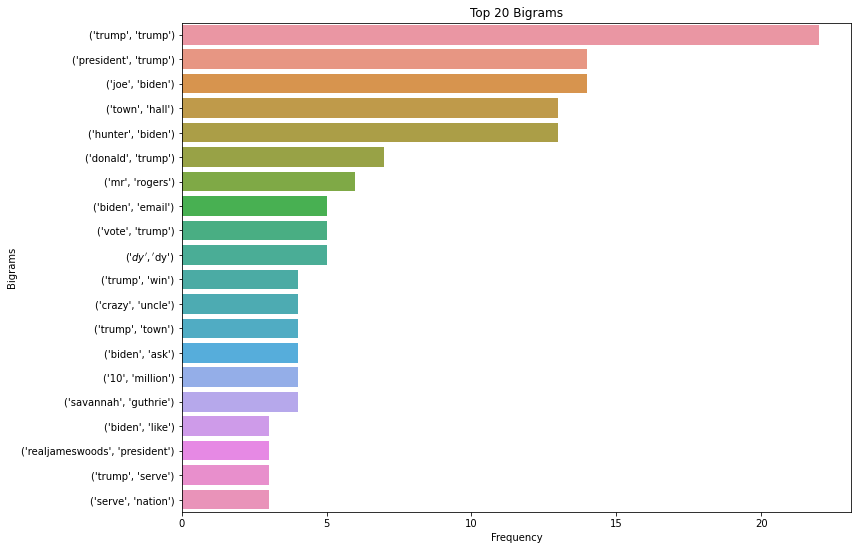

In [28]:
top_bigram = pd.DataFrame(top_20_bigrams, columns=['bigram', 'frequency'])
top_bigram.set_index('bigram', inplace=True)
_ = plt.figure(figsize=(12,9))
_ = sns.barplot(x=top_bigram.frequency, y=top_bigram.index, orient='h')
_ = plt.xlabel('Frequency')
_ = plt.ylabel('Bigrams')
_ = plt.title('Top 20 Bigrams')
plt.show()

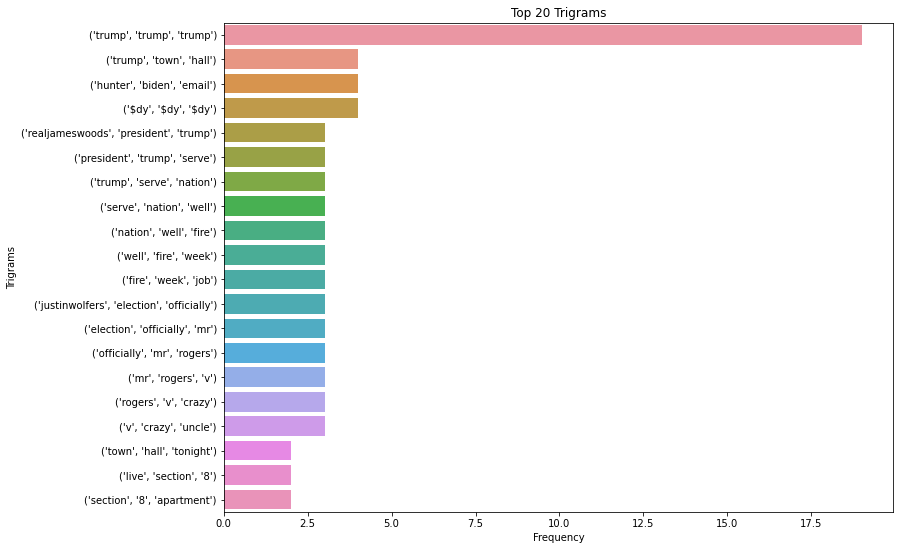

In [29]:
trigrams = tweets.apply(lambda x: ngrams(x,3))
tri_grams = trigrams.apply(lambda x: list(x))
top_20_trigrams = Counter(itertools.chain.from_iterable(tri_grams)).most_common(20)
top_trigram = pd.DataFrame(top_20_trigrams, columns=['bigram', 'frequency'])
top_trigram.set_index('bigram', inplace=True)
_ = plt.figure(figsize=(12,9))
_ = sns.barplot(x=top_trigram.frequency, y=top_trigram.index, orient='h')
_ = plt.xlabel('Frequency')
_ = plt.ylabel('Trigrams')
_ = plt.title('Top 20 Trigrams')
plt.show()

In [30]:
# We also can generate a wordcloud

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

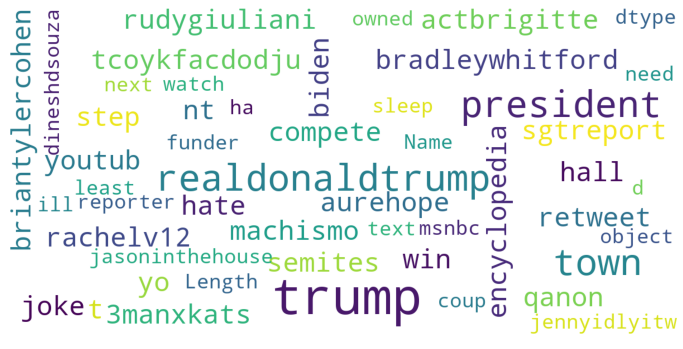

In [31]:
show_wordcloud(tweets)

In [33]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [34]:
# We shall now lemmatize any words not lemmatized into a column. 

lemmatizer = WordNetLemmatizer()
tidy_tweets['lemmatized'] = tidy_tweets['text'].apply(lambda x: [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in x])

In [35]:
tidy_tweets['tokens_back_to_text'] = [' '.join(map(str, l)) for l in tidy_tweets['lemmatized']]

In [36]:
tidy_tweets.head()

,text,lemmatized,tokens_back_to_text
0,"[rudygiuliani, compete, town, hall, joke, step...","[rudygiuliani, compete, town, hall, joke, step...",rudygiuliani compete town hall joke stephanopo...
1,"[rachelv12, trump, machismo, tcoykfacdodju]","[rachelv12, trump, machismo, tcoykfacdodju]",rachelv12 trump machismo tcoykfacdodju
2,"[briantylercohen, biden, like, encyclopedia, t...","[briantylercohen, biden, like, encyclopedia, t...",briantylercohen biden like encyclopedia tonigh...
3,"[bradleywhitford, yo, semites, qanon, nt, hate...","[bradleywhitford, yo, semite, qanon, nt, hate,...",bradleywhitford yo semite qanon nt hate democr...
4,"[actbrigitte, retweet, president, trump, win, ...","[actbrigitte, retweet, president, trump, win, ...",actbrigitte retweet president trump win debate


In [37]:
path = r"C:\Users\jackn\Documents\Machine Learning with Python\tidy_test_tweets.json"
tidy_tweets.to_json(path, orient='table')

In [39]:
# I am now analyzing the the sentiment of the tweets

from textblob import TextBlob

tidy_tweets['sentiment'] = tidy_tweets['tokens_back_to_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

tidy_tweets.head()

,text,lemmatized,tokens_back_to_text,sentiment
0,"[rudygiuliani, compete, town, hall, joke, step...","[rudygiuliani, compete, town, hall, joke, step...",rudygiuliani compete town hall joke stephanopo...,0.0625
1,"[rachelv12, trump, machismo, tcoykfacdodju]","[rachelv12, trump, machismo, tcoykfacdodju]",rachelv12 trump machismo tcoykfacdodju,0.0000
2,"[briantylercohen, biden, like, encyclopedia, t...","[briantylercohen, biden, like, encyclopedia, t...",briantylercohen biden like encyclopedia tonigh...,0.0000
3,"[bradleywhitford, yo, semites, qanon, nt, hate...","[bradleywhitford, yo, semite, qanon, nt, hate,...",bradleywhitford yo semite qanon nt hate democr...,-0.8000
4,"[actbrigitte, retweet, president, trump, win, ...","[actbrigitte, retweet, president, trump, win, ...",actbrigitte retweet president trump win debate,0.8000


In [40]:
neutral_count = 0
pos_count = 0
neg_count = 0

for score in tidy_tweets['sentiment']:
    if score == 0:
        neutral_count += 1
    elif score < 0:
        neg_count += 1
    elif score > 0:
        pos_count += 1
        
print(neutral_count)
print(pos_count)
print(neg_count)

98
59
43


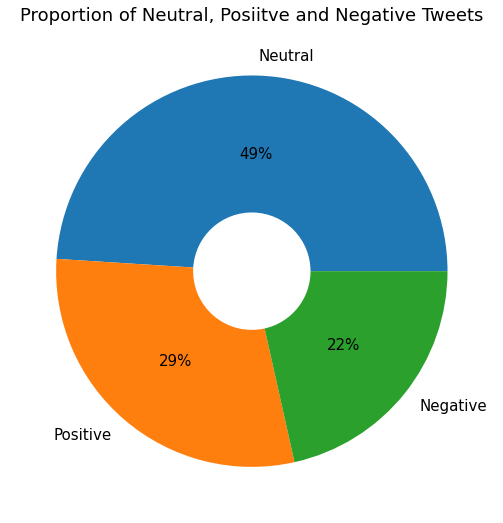

In [41]:
sentiemnt_pie_data = [neutral_count, pos_count, neg_count]

sentiment_pie = plt.figure(figsize = (12, 9))
sentiment_pie = plt.pie(sentiemnt_pie_data, labels = ['Neutral', 'Positive', 'Negative'], 
                        wedgeprops=dict(width=.7), 
                        autopct = '%1.0f%%',
                        textprops = {'fontsize': 15})
sentiment_pie = plt.title('Proportion of Neutral, Posiitve and Negative Tweets', fontsize = 18)
plt.show()